In [183]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Doğrusal Programlama Nedir ?

## Giapetto'nun Oyuncak Atölyesi

In [185]:
class üretim_süreci():
    
    def __init__(self,ad,süre=0):
        self.ad=ad
        self.süre=süre
      
    
    def __str__(self):
        return self.ad

In [186]:
class ürün():
    
        def __init__(self,ad):
            self.ad=ad
            self.talep_adet=np.inf
            self.stok_adet=0
            self.satış_adet=0
            
        def maliyet_fonksiyonu(self,hammadde_maliyeti,işçilik_maliyeti):
            self.hammadde_maliyeti=hammadde_maliyeti
            self.işçilik_maliyeti=işçilik_maliyeti
            self.maliyet=self.hammadde_maliyeti+self.işçilik_maliyeti
            return self.maliyet
            
        def kar_fonksiyonu(self,satış_fiyatı):
            self.satış_fiyatı=satış_fiyatı
            self.kar=self.satış_fiyatı-self.maliyet
            return self.kar
            
        def üretim_süreçleri(self,süreçler):
            self.üretim_süresi= sum([i.süre for i in süreçler])
            return self.üretim_süresi

        def talep_fonksiyonu(self,adet=np.inf):
            self.talep_adet=adet
            return self.talep_adet 
        
        def üretim_fonskiyonu(self,adet):
            self.üretim= adet
            self.toplam_üretim_süresi=self.üretim*self.üretim_süresi
            return self.üretim
                
        def stok_fonksiyonu(self,adet=0):
            self.stok_adet=adet
            return self.stok_adet
            
        def satış_fonksiyonu(self,adet=0):
            self.satış_adet=adet
            return self.satış_adet
            
        def toplam_gelir_fonksiyonu(self):
            self.toplam_gelir_=self.satış_adet*self.kar
            return self.toplam_gelir_
        
        def toplam_maliyet_fonksiyonu(self):
            self.toplam_maliyet=self.satış_adet*self.kar
            return self.toplam_maliyet
            
        def toplam_kar_fonksiyonu(self):
            self.toplam_kar=self.satış_adet*self.kar
            return self.toplam_kar
            
        def __str__(self):
            return self.ad

In [187]:
asker_oyuncak=ürün('asker oyuncak')
asker_oyuncak.maliyet_fonksiyonu(10,14);
print("Asker oyuncak karı :",asker_oyuncak.kar_fonksiyonu(27))

Asker oyuncak karı : 3


In [188]:
tren_oyuncak=ürün('tren oyuncak')
tren_oyuncak.maliyet_fonksiyonu(9,10);
print("Tren oyuncak karı : ",tren_oyuncak.kar_fonksiyonu(21))

Tren oyuncak karı :  2


In [189]:
asker_doğrama=üretim_süreci('asker doğrama',1)
asker_cila=üretim_süreci('asker cila',2)
print("Asker oyuncak üretim süresi :",asker_oyuncak.üretim_süreçleri([asker_doğrama,asker_cila]))

Asker oyuncak üretim süresi : 3


In [190]:
tren_doğrama=üretim_süreci('tren doğrama',1)
tren_cila=üretim_süreci('tren cila',1)
print("Tren oyuncak üretim süresi : ",tren_oyuncak.üretim_süreçleri([tren_doğrama,tren_cila]))

Tren oyuncak üretim süresi :  2


In [191]:
toplam_doğrama_süresi=80
toplam_cila_süresi=100

In [192]:
asker_oyuncak.talep_fonksiyonu(40)

40

In [193]:
print("Asker oyuncak haftalık talep : ",asker_oyuncak.talep_adet)

Asker oyuncak haftalık talep :  40


In [194]:
print("Tren oyuncak haftalık talep : ",tren_oyuncak.talep_adet)

Tren oyuncak haftalık talep :  inf


<p> Kaç adet tren ve kaç adet asker oyuncak üretmelidir ki karını maksimize hale getirebilsin ? </p>

Karar Değişkenleri :
* Üretilecek Oyuncak Tren Adedi
* Üretilecek Oyuncak Asker Adedi

Amaç Fonskiyonu :
* Doğrusal Programlama'da karı maksimize etmek  veya maliyeti minimize etmek üzerine kullanılan fonskiyonlara <b> amaç fonskiyonu </b> denir. 
    
* Giapetto satamayacağı ürünü üretmeyeceği için , bütün üretimin satılacağı farz ediyoruz. 

Öyleyse  Amaç  fonskiyonumuz:

In [195]:
def amaç_fonskiyonu(asker_oyuncak,tren_oyuncak):
    return asker_oyuncak.kar*asker_oyuncak.üretim + tren_oyuncak.kar * tren_oyuncak.üretim

In [196]:
# üretim miktarları
asker_oyuncak.üretim_fonskiyonu(40)
tren_oyuncak.üretim_fonskiyonu(20)

20

In [197]:
# amaç
amaç_fonskiyonu(asker_oyuncak,tren_oyuncak)

160

* asker_oyuncak.kar # katsayı
* tren_oyuncak.kar  # katsayı


Kısıtlar  :

    Olabildiğince üretimi artırarak kar elde etmek istesekte aşağıdaki kısıtlar yüzünden bu mümkün değildir.
    
* Kısıt 1 - Toplam doğrama süresi 80 saatten fazla olamaz.
* Kısıt 2 - Toplam cilalama süresi 100 saaten fazla olamaz. 
* Kısıt 3 -  En fazla 40 adet asker satabiliriz.

kısıt1
 * asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim =<80

kısıt2
 * asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim=<100

kısıt3
 * asker_oyuncak.üretim=<40

Not:
* Kısıtlarda değişkenlerin katsayınalarına teknolojik katsayı denilir. Örneğin asker_cila.süre bir teknolojik katsayıdır.
* Kısıtların sağ tarafındaki değerlere rhs (right hand side) denir. Eldeki ulaşılabilir kaynağı göstermektedir.

* Karar değişkenleri negatif olmaması veya tam sayı olması da bir kısıttır. Negatif olmaması sr (sign restriction) veya olması (unrestricted in sign) urs.


* asker_oyuncak.üretim>=0 - sr
* tren_oyuncak.üretim>=0 - sr

<b> Optimizasyon Modeli  </b>

* <b> maksimize </b>  asker_oyuncak.kar*asker_oyuncak.üretim + tren_oyuncak.kar * tren_oyuncak.üretim (amaç)

Aşağıdakilere tabidir
    
    * asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim =<80 (doğrama kısıtı)
    * asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim=<100 (cila kısıtı)
    * asker_oyuncak.üretim=<40 (asker kısıtı)
    * asker_oyuncak.üretim>=0 (negatiflik kısıtı)
    * tren_oyuncak.üretim>=0 (negatiflik kısıtı)

<b> Doğrusal Fonskiyon </b>

c1, c2, . . . , cn, f (x1, x2, . . . , xn) = c1x1 + c2x2 +.....+ cnxn. 

    * Değişkenlerin üssü 1 veya 0 olmalıdır.

<b> Doğrusal Eşitsizlikler </b>

f(x1,x2, . . . , xn) =< b ve f (x1, x2, . . . , xn) => b 
* Değişkenlerin üssü 1 veya 0 olmalıdır.

**Doğrusal Programlama Problemleri**nde aşağıdaki adımlar izlenerek sonuçlar bulunur.,
* 1 - Maksimizasyon ve minimizasyon yapmak için değişkenleriyle oynadığımız fonksiyona amaç fonskiyonu denir.
* 2 - Karar değişkenlerinin değerleri kısıtları sağlamalıdır. Herbir doğrusal denklem veya eşitsizlik için geçerlidir.
* 3 - Negatiflik durumu her bir değişken için geçerlidir.

**Oransallık ve Eklenebilirlik Kabulleri** 
* Her bir karar değişkeninin etkisi değeri ile orantılıdır.
* Her bir karar değişkenin etkisi diğer karar değişkenlerinden bağımsızdır.

Bu kabuller Doğrusal Programlamanın yapılabilmesi için şarttır.

**Bölülenebilirlik Kabulu**

Tren adedi 5.2 olabileceği veya asker adedi 3.5 olabileceği kabul edilir.Eğer kabul edilmiyorsa yani tam sayı olmaları gerekirse bu soru **Tamsayı Programlama Problemine** dönüşür.


**Kesinlik Kabulu**

Değişkenler dışındaki bütün parametrelerin bilindiği kabul edilmiştir.

**Uygulanabilir Bölge**

40 asker ve 20 tren Giapetto'nun atölyesi için uygunalabilir değerlerdir. Çünkü bütün kısıtları karşılıyorlar.

In [198]:
asker_oyuncak.üretim_fonskiyonu(40)
tren_oyuncak.üretim_fonskiyonu(20)

20

In [199]:
asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim <=80 # (doğrama kısıtı)

True

In [200]:
asker_cila.süre*asker_oyuncak.üretim + tren_cila.süre * tren_oyuncak.üretim  <=100#  (cila kısıtı)

True

In [201]:
asker_oyuncak.üretim<=40 # (asker kısıtı)

True

In [202]:
asker_oyuncak.üretim>=0 # (negatiflik kısıtı)

True

In [203]:
tren_oyuncak.üretim>=0 # (negatiflik kısıtı)

True

In [204]:
asker_oyuncak.üretim_fonskiyonu(15)
tren_oyuncak.üretim_fonskiyonu(70)


70

In [205]:
asker_doğrama.süre*asker_oyuncak.üretim + tren_doğrama.süre * tren_oyuncak.üretim <=80 # (doğrama kısıtı)

False

**En İyi Çözüm**

Maksimizasyonda amaç fonskiyonunu en fazla yapan ve kısıtlara uyan karar değişkenleridir. Minimizasyonda ise en düşük yapan ve aynı şekilde kısıtlara uyan karar değişkenleridir.

**Çözüm Durumu**
* Tek çözüm
* Sonsuz Çözüm
* Çözümsüz

### Sorular

#### Soru 1 


In [206]:
acre
wheat 
bushel
labor

NameError: name 'acre' is not defined

In [ ]:
1 acre_wheat 25 bushel wheat 10 hour
1 acre_corn  10 bushel corn  4 hour

1 bushel wheat 4
1 bushel corn  3

In [ ]:
1 week 40 hours
7 acres 

In [ ]:
corn>=30 bushel

   
**maksimize** x1\*3\*10+x2\*4\*25

* x1+x2=7
* x1\*4+x2\*10<=40
* x1*10>=30
* x2>=0


#### Soru 2 


##### a

In [ ]:
x1=2;x2=3
x1+x2==7

##### b

In [ ]:
def çözüm_bölgesi(x1,x2):
    x=0
    print(x)
    x+=x1+x2==7
    print(x)
    x+=x1*4+x2*10<=40
    print(x)
    x+=x1>=3
    print(x)
    x+=x2>=0
    print(x)
    
    if x==5:
        return True
    else:
        return False

In [ ]:
x1=4;x2=3
çözüm_bölgesi(x1,x2)

##### c

In [ ]:
x1=2;x2=-1
çözüm_bölgesi(x1,x2)

##### d

In [ ]:
x1=3;x2=2
çözüm_bölgesi(x1,x2)

#### Soru 3 

* x1 =  bushel corn 
* x2 =  bushel of wheat

**maksimize** x1\*3+x2\*4

*   x1/10+x2/25=7
*   x1/10\*4+x2/25\*10<=40
*   x1>=30
*   x2>=0

#### Soru 4

**maksimize** t1\*300+t2\*500

* painting
 
    t1/800+t2/700<=1
    
*  assembling
 
    t1/1500+t2/1200<=1
    
* sign
     
     t1>=0
     t2>=0
    

    

#### Soru 5

< ve > kısıtlarına izin verilmemesinin sebebi , kenarları belirli bir uzay-(çözüm kümesi) yaratabilmek için olabilir.

## İki Değişkenli Doğrusal Programlama Sorunun Görsel Çözümü 

 2x1 + 3x2 <= 6

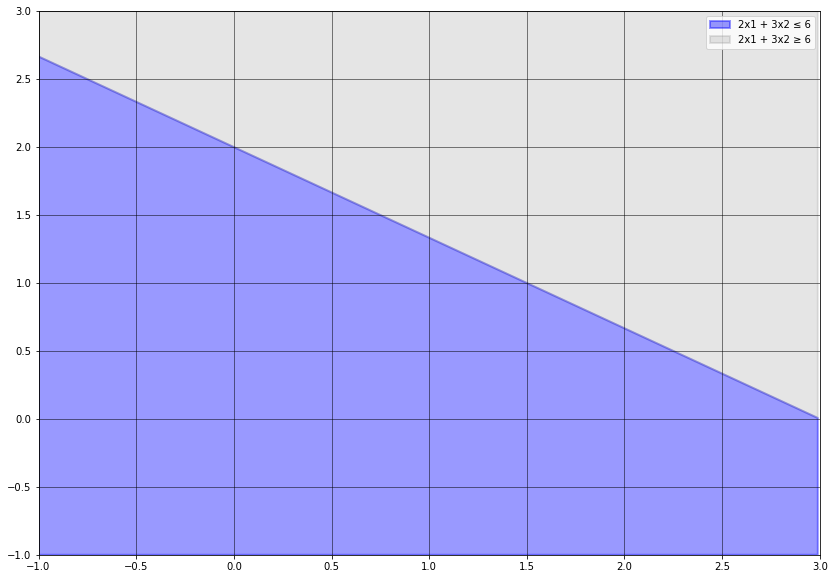

In [359]:
x1=np.arange(-3, 3, 0.01)
x2=(6-2*x1)/3
x_bottom=-1
y_bottom=-1
x_top=3
y_top=3
fig, ax = plt.subplots(figsize=(14, 10))
ax.fill_between(x1,x_bottom ,  x2,color='blue', lw=2, alpha=0.4)
ax.fill_between(x1, x2, y_top ,color='grey', lw=2, alpha=0.2)
ax.legend(['2x1 + 3x2 ≤ 6','2x1 + 3x2 ≥ 6'])
ax.set_ylim(y_bottom, y_top)
ax.set_xlim(x_bottom, x_top)
ax.grid(color='black', linestyle='-', linewidth=0.5);

**Uygun Çözüm Bulabilmek**

Giapetto'nun Problemi

* 2x1 + x2 <= 100 
* x1  + x2 <= 80 
* x1       <= 40 
* x1       >= 0 
*       x2 >= 0 

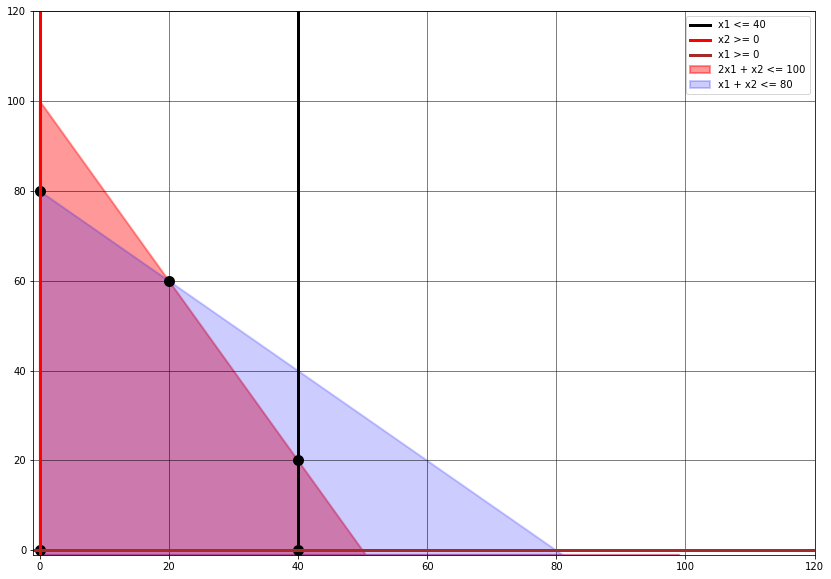

In [567]:
x_bottom=-1
y_bottom=-1
x_top=120
y_top=120

fig, ax = plt.subplots(figsize=(14, 10))

x1=np.arange(0, 100, 1)
x2=100-2*x1

ax.fill_between(x1,x_bottom ,  x2,color='red', lw=2, alpha=0.4)

x2=80-x1

ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=2, alpha=0.2)

ax.axvline(40, lw=3,color='black' )

ax.axvline(0, lw=3,color='red' )

ax.axhline(0, lw=3,color='brown' )
ax.scatter([0],[80],lw=5,color='black',marker='o')
ax.scatter([20],[60],lw=5,color='black',marker='o')
ax.scatter([40],[20],lw=5,color='black',marker='o')
ax.scatter([40],[0],lw=5,color='black',marker='o')
ax.scatter([0],[0],lw=5,color='black',marker='o')
ax.legend(['x1 <= 40','x2 >= 0','x1 >= 0','2x1 + x2 <= 100','x1 + x2 <= 80'],loc='upper right')
ax.set_ylim(y_bottom, y_top)
ax.set_xlim(x_bottom, x_top)
ax.grid(color='black', linestyle='-', linewidth=0.5)

Amaç fonskiyonunu da görsele eklemek gerekiyor. 
* z = 3 \* x1 + 2 \* x2


Bu çizeceğimiz doğru ile onu paralelde oynatarak optimal çözümü bulabiliriz. 

In [608]:
def çizdir(a,b):
    x_bottom=-1
    y_bottom=-1
    x_top=120
    y_top=120

    fig, ax = plt.subplots(figsize=(14, 10))

    x1=np.arange(0, 100, 1)
    x2=100-2*x1

    ax.fill_between(x1,x_bottom ,  x2,color='red', lw=2, alpha=0.4)

    x2=80-x1

    ax.fill_between(x1,  x_bottom,x2 ,color='blue', lw=2, alpha=0.2)

    ax.axvline(40, lw=3,color='black' )

    ax.axvline(0, lw=3,color='red' )

    ax.axhline(0, lw=3,color='brown' )
    ax.scatter([0],[80],lw=5,color='black',marker='o')
    ax.scatter([20],[60],lw=5,color='black',marker='o')
    ax.scatter([40],[20],lw=5,color='black',marker='o')
    ax.scatter([40],[0],lw=5,color='black',marker='o')
    ax.scatter([0],[0],lw=5,color='black',marker='o')
  
    ax.legend(['x1 <= 40','x2 >= 0','x1 >= 0','2x1 + x2 <= 100','x1 + x2 <= 80'],loc='upper right')
    ax.set_ylim(y_bottom, y_top)
    ax.set_xlim(x_bottom, x_top)
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    z=3*a+2* b
    x=np.arange(0, 100, 1)
    y=(z-3*x)/2
    ax.plot(x,  y,color='green', lw=5)

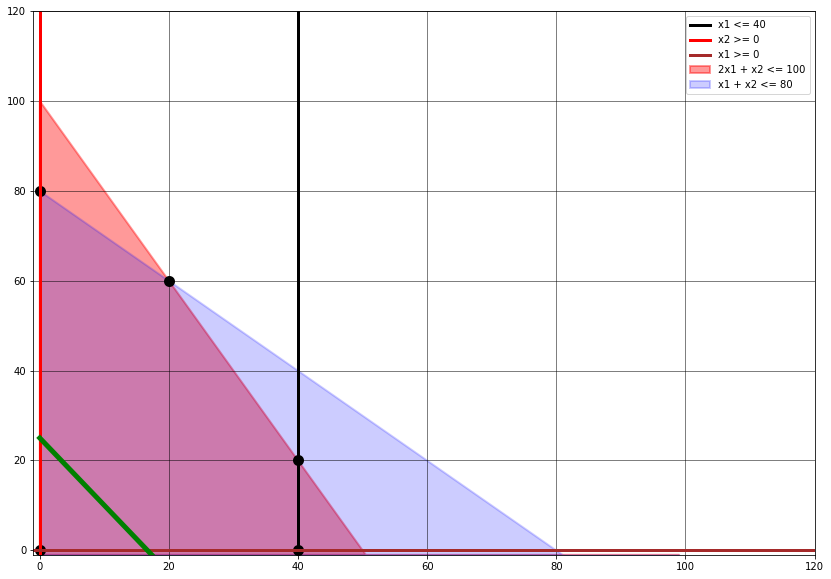

In [609]:
çizdir(10,10)

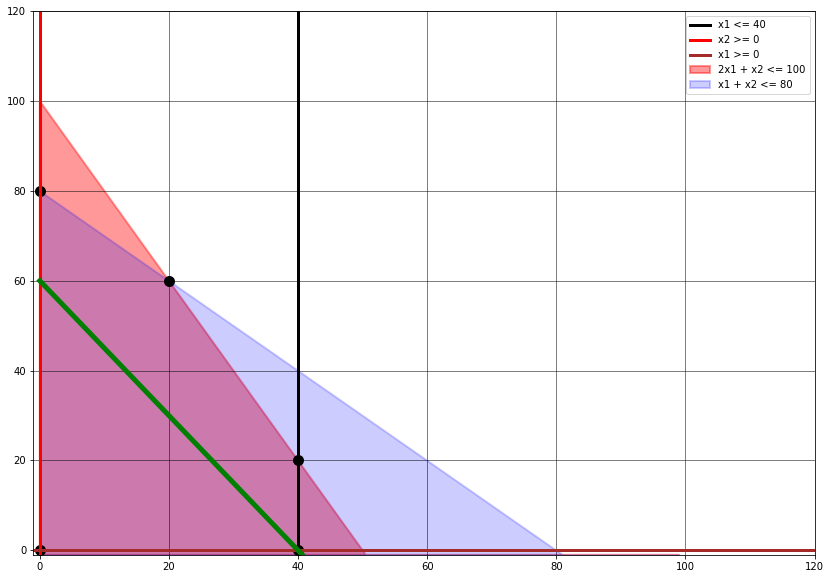

In [610]:
çizdir(40,0)

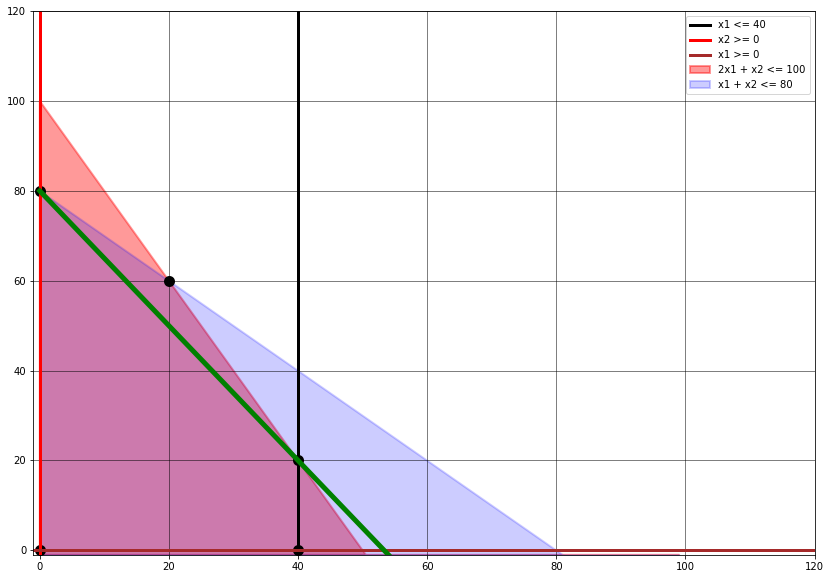

In [611]:
çizdir(0,80)

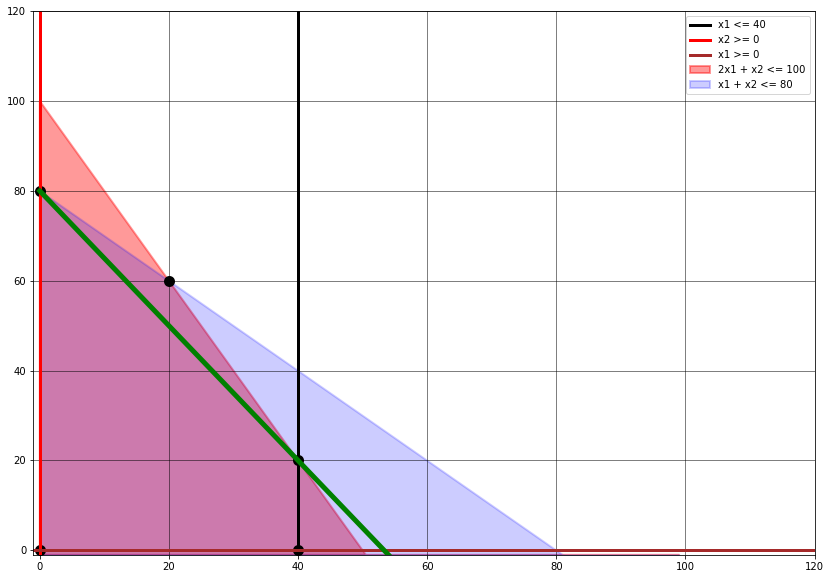

In [613]:
çizdir(40,20)

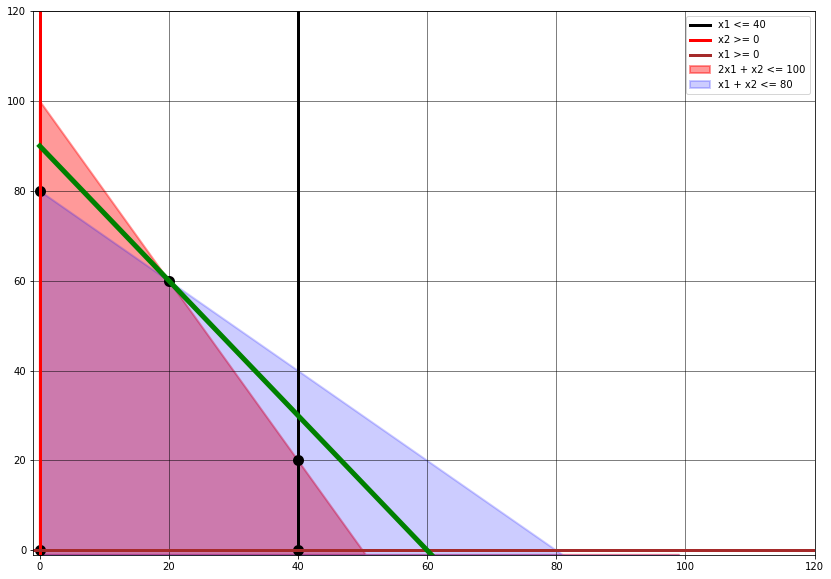

In [614]:
çizdir(20,60)

**Bağlayıcı ve Bağlayıcı Olmayan Kısıtlar**
* Bağlayıcı kısıtlar optimal çözümde eşitliğin sağ ve solu eşit olan kısıtlardır.
    * '2x1 + x2 <= 100'
    * 'x1 + x2 <= 80'
* Eşitliğin sağ ve solu eşit olmayan kısıtlar ise bağlayıcı olmayan kısıtlardır.       
    * 'x1 <= 40',
    * 'x2 >= 0',
    * 'x1 >= 0',

**Dışbukey , Uç Noktalar, ve Doğrusal Programlama**
* Eğer oluşan çözüm kümesinin noktaları bir birbirine doğrusal parçalarla bağlanabiliyorsa buna dışbükey küme diyoruz. Üstteki sorun böyleydi.
* Dışbukey bir kümenin en sonunda kalan noktalara ekstrem noktalar denir. Bu noktaların bir ismi de kenar noktalardır. Üstlerinden bir doğru geçmez. Doğru parçasının genelde son noktasıdırlar. Bu noktalar sayesinde çözüm alanımız azalır.

Not: **Eğer soru doğrusal değilse ekstrem noktalarda çözüm oluşmaz.**

https://www.isaacslavitt.com/2014/06/20/linear-optimization-in-python/